# Tutorial on changing parameters of acquisition/histogram

In [1]:
from TCSPC import *

In [3]:
NADH = Simulation([0.75,0.25],[0.4,4]) #create sim instance of simulation class
EGFP = Simulation([0.503,0.497],[3.07,2.43]) #EGFP
mCherry  = Simulation([0.83,0.17],[1.43,2.38]) #mCherry

### Change number of photons directly through `Simulation.n_photon`

Signal to Noise Ratio (SNR) increases as n_photon increases.\
Poisson noise =$\sqrt{N}$ where $N$ is the number of photons at time $t$.\
SNR = $N/\sqrt{N}$ = $\sqrt{N}$

In [4]:
sim_list = [NADH,EGFP,mCherry] #list of Simulation class objects
sim_name = ['NADH','EGFP','mCherry'] #list of names for the Simulations

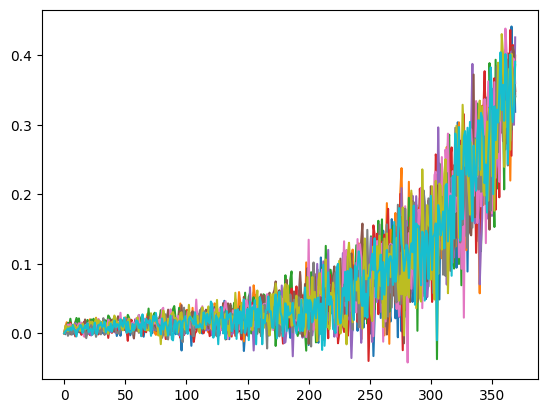

In [10]:
sim = EGFP 
y_list = []

for n_photon in np.logspace(6,9,10):
    sim.n_photon = int(n_photon)
    #regenerate simulation
    sim.MC_exp()
    sim.MC_exp_hist()
    idx = np.argmax(sim.y) #index of maximum, trim from maximum
    y_list.append(sim.y[idx:]/np.max(sim.y)) #append normalized data (maximum is 1)
    y_pure= exp2(sim.t[:-idx],sim.amp[0],*sim.tau) #pure signal
    plt.plot((y_list[-1]-y_pure)/y_list[-1])